<a href="https://colab.research.google.com/github/kakyoung/class2022spring/blob/main/sound_processing%2B%ED%95%84%EA%B8%B0%2B%EC%9D%B4%ED%95%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digital Signal Processing
> sampling rate(Hz), frequency(Hz), phasor

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

### Phasor (sine)

In [27]:
# parameter setting
amp = 1          # range [0.0, 1.0]
sr = 10000     # sampling rate, Hz
dur = 0.5        # in seconds
freq = 100.0     # sine frequency, Hz
phase = 0  # phase, radian (시작점)

In [28]:
# generate sample ticks=함수를 나누는 tick
nSamp = sr * dur
samples = np.arange(1, nSamp+1)
#1~5000 만든게 샘플로 들어감

# convert sample to time (sec)
t = samples/sr
#sampletick-timetick

# convert time to angle (radian)
theta0 = t * 2*np.pi * freq

# shift angle by phase
theta = theta0 + phase

# generate signal by sin-phasor
s = amp * np.sin(theta)

Text(0, 0.5, 'real')

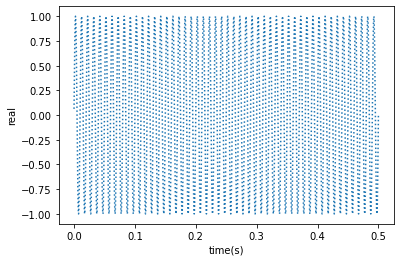

In [33]:
plt.plot(t,s,':')
plt.xlabel("time(s)")
plt.ylabel('real')

In [ ]:
# plot the entire signal
plt.plot(theta, s, ':')
plt.xlabel('angle (radian)')
plt.ylabel('real')

Text(0, 0.5, 'real')

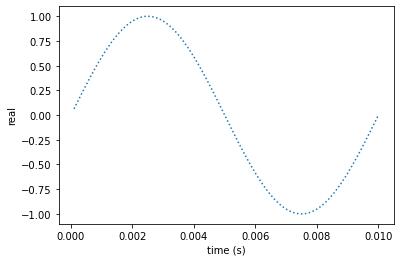

In [31]:
# plot a certain portion of signals
sampleRng = np.arange(0,100)
plt.plot(t[sampleRng], s[sampleRng], ':')
plt.xlabel('time (s)')
plt.ylabel('real')

In [34]:
ipd.Audio(s, rate=sr)

In [35]:
def phasor_sine(amp, sr, dur, freq, phase):
  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq + phase
  s = amp * np.sin(theta)
  return s, t, theta

In [36]:
amp = 1; sr = 10000; dur = 1; freq = 110; phase = 0
s, t, theta = phasor_sine(amp, sr, dur, freq, phase)
ipd.Audio(s, rate=sr)

### Phasor (complex)

In [37]:
# parameter setting
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz
dur = 0.5        # in seconds
freq = 100.0     # sine frequency, Hz
phase = 0  # phase, radian

In [39]:
# generate sample ticks
nSamp = sr * dur
samples = np.arange(1, nSamp+1)

# convert samples to time
t = samples/sr

# convert time to angle in radian
theta0 = t * 2*np.pi * freq

# shift angle by phase
theta = theta0 + phase



In [40]:
# generate signal by complex-phasor
c = amp * np.exp(theta*1j)
#e^theta^j

In [ ]:
# plot the entire signal
import plotly.graph_objects as go
x, y, z = t, c.real, c.imag
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers',
                                   marker=dict(size=3))])
fig.update_layout(scene = dict(
                    xaxis_title='time (sec)',
                    yaxis_title='real',
                    zaxis_title='imag'))
fig.show()

In [ ]:
# plot a certain portion of signals
import plotly.graph_objects as go
sampleRng = np.arange(0,100)
x, y, z = t[sampleRng], c.real[sampleRng], c.imag[sampleRng]
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers',
                                   marker=dict(size=3))])
fig.update_layout(scene = dict(
                    xaxis_title='time (sec)',
                    yaxis_title='real',
                    zaxis_title='imag'))
fig.show()

In [ ]:
ipd.Audio(c, rate=sr)

In [ ]:
def phasor_complex(amp, sr, dur, freq, phase):
  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq + phase
  c = amp * np.exp(theta*1j)
  return c, t, theta

In [ ]:
amp = 1; sr = 10000; dur = 1; freq = 440; phase = 0
c, t, theta = phasor_complex(amp, sr, dur, freq, phase)
ipd.Audio(c.real, rate=sr)